# Finding Square Root

Before going into the linear regression, we will start with the simple machine learning problem of finding the square root of a number

#### Algorithm - 1 

First algorithm we will use is that we will average the values between min and max, then check how close we are to the result

In [2]:
def get_square_root(n):
    min_val = 1
    max_val = n
    avg_val = (1+n)/2
    error = (avg_val)**2 - n
    while abs(error)>0.0001:
        if error>0:
            max_val = avg_val
        else:
            min_val = avg_val
        
        avg_val = (min_val + max_val)/2
        error = (avg_val)**2 - 3
    return avg_val

get_square_root(3)

1.7320556640625

In [93]:
np.sqrt(3)

1.7320508075688772

### Algorithm - 2
Here we use the property that AM>=GM

In [67]:
def get_square_root(n):
    arithmetic_mean = (1+n)/2
    error = arithmetic_mean**2 - 3
    while error>0.001:
        arithmetic_mean = (n/arithmetic_mean + arithmetic_mean)/2
        error = arithmetic_mean**2 - 3
    
    return arithmetic_mean

get_square_root(3)

1.7321428571428572

### Algorithm - 3
We use gradient descent approach
Let f(x) = x^2 - 3

Now, we find the root of the above function

In [3]:
def gradient_descent(n):
    initial_guess = n/2
    error = initial_guess**2 - 3
    previous_val = initial_guess
    while abs(error)>0.001:
        next_val = previous_val - (previous_val**2 - 3)/(2*previous_val)
        error = next_val**2 - 3
        previous_val = next_val
    return next_val

gradient_descent(3)

1.7321428571428572

# Linear Regression

### Load the housing dataset

In [5]:
import pandas as pd

housing_df = pd.read_csv("datasets/housing.csv")
housing_df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#### Let's check price and area of the housing df

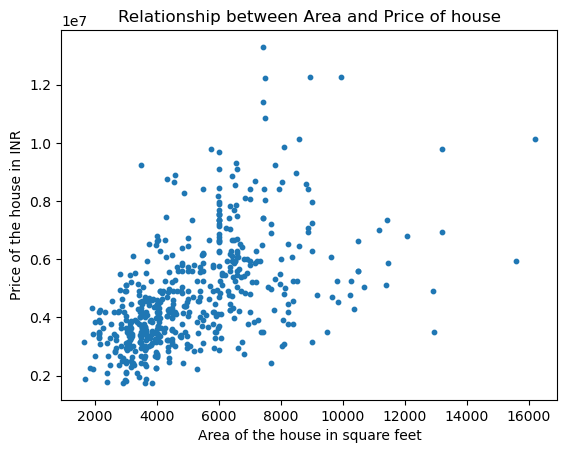

In [6]:
import matplotlib.pyplot as plt

# We have the housing data, let's do a quick scatter plot of price and the area
plt.figure()
# plot
plt.scatter(housing_df['area'], housing_df['price'], s=10)

# add a label to the x axis
plt.xlabel('Area of the house in square feet')
# add a label to the y axis
plt.ylabel('Price of the house in INR')
# add a title
plt.title('Relationship between Area and Price of house');

In [7]:
housing_df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

### Now we fit simple linear regression model
Not that we are using statsmodels module to fit the linear regression. We are using OLS function which stands for ordinary least squares regression. We have to provide the formula in that. Formula is in format:
\<dependent variable\> ~ \<independent variable\>

Once we define the above, we need to call fit() function on this to fit the regression line. The regression line that is fit will store the result in the variable.

From the result variable stored, we will then look at the summary() to get the basic stats of linear regression

In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(housing_df[['area']], housing_df[['price']])


LinearRegression()

In [9]:
from sklearn.metrics import r2_score

In [10]:
r2_score(housing_df[['price']], model.predict(housing_df[['area']]))

0.2872931546811468

In [18]:
import statsmodels.formula.api as smf
import numpy as np
# performing the regression
result = smf.ols(formula='price ~ area', data=housing_df).fit()
# result = smf.ols(formula="""
# price ~ area + bathrooms + stories +  C(parking) +
# C(furnishingstatus) + C(mainroad) + C(basement) + C(hotwaterheating) +
# C(airconditioning) + C(prefarea)
# """, data=housing_df).fit()

# Result of statsmodels 
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.287
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     218.9
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           7.39e-42
Time:                        16:06:37   Log-Likelihood:                -8551.2
No. Observations:                 545   AIC:                         1.711e+04
Df Residuals:                     543   BIC:                         1.712e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.387e+06   1.74e+05     13.681      0.0

## Interpretation of OLS Regression

### Interpreting coefficients and slope
Note the value under "coef" column in the summary table. There are two values, one "Intercept" and the other is "area". As you remember the linear regression line equation, y = b0 + b1(x), b0 is same as the intercept and b1 is equal to value of area.

So, final equation will be Price = 2.38 * 10^6 + 461.97 * area, with this line equation we can find find price for any house with any area.

In [19]:
# To get the intercept value
b0 = result.params.Intercept
b0

2387308.482396431

In [20]:
# To get the slope value for are
b1 = result.params.area
b1

461.97489427278344

In [22]:
# Final regression line equation is
# y_pred = b0 + b1 * area, where b0 = 2387308, and b1 = 461.974
result.get_prediction(pd.Series([15000], name='area')).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,9.316932e+06,314919.021893,8.698323e+06,9.935541e+06,6.151229e+06,1.248263e+07


In [47]:
import numpy as np
test_df = housing_df.sample(frac=0.2)
train_df = housing_df[~housing_df.index.isin(test_df.index)]
print(train_df.shape)
print(test_df.shape)

(436, 13)
(109, 13)


In [31]:
final_model = smf.ols(formula="""
price ~ area + bathrooms + stories +  C(parking) +
C(furnishingstatus) + C(mainroad) + C(basement) + C(hotwaterheating) +
C(airconditioning) + C(prefarea)
""", data=train_df).fit()
print(final_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     70.69
Date:                Sun, 17 Dec 2023   Prob (F-statistic):           3.33e-97
Time:                        16:14:15   Log-Likelihood:                -6680.2
No. Observations:                 436   AIC:                         1.339e+04
Df Residuals:                     422   BIC:                         1.345e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------

In [48]:
test_predictions = final_model.get_prediction(test_df.iloc[:, 1:]).summary_frame(alpha=0.05)['mean'].tolist()
test_actual = test_df.price.tolist()
test_predictions_df = pd.DataFrame([test_predictions, test_actual]).T
test_predictions_df.columns = ['Predicted', 'Actual']
test_predictions_df.head()

,Predicted,Actual
0,4.297813e+06,2380000.0
1,2.737174e+06,2100000.0
2,3.082757e+06,4340000.0
3,3.769985e+06,3780000.0
4,5.772570e+06,5250000.0


In [51]:
from sklearn.metrics import r2_score

r2_score(test_predictions_df[['Predicted']], test_predictions_df[['Actual']])

0.5391221412610341

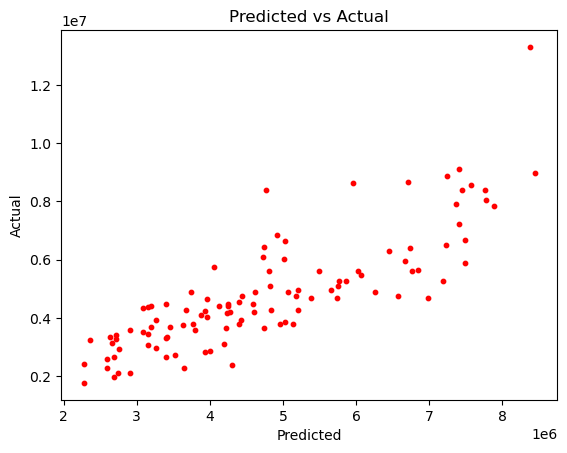

In [50]:
import matplotlib.pyplot as plt

# We have the housing data, let's do a quick scatter plot of price and the area
plt.figure()
# plot
plt.scatter(test_predictions_df['Predicted'], test_predictions_df['Actual'], color='red', s=10)

# add a label to the x axis
plt.xlabel('Predicted')
# add a label to the y axis
plt.ylabel('Actual')
# add a title
plt.title('Predicted vs Actual');

#### Interpretation of intercept is the value of "y" when x is equal to zero. And interpretation of area coefficient is how much price increase with per unit increase in the area. So if you increase the area by 1 square foot, the price increases by 461.9748

### Plot the regression line

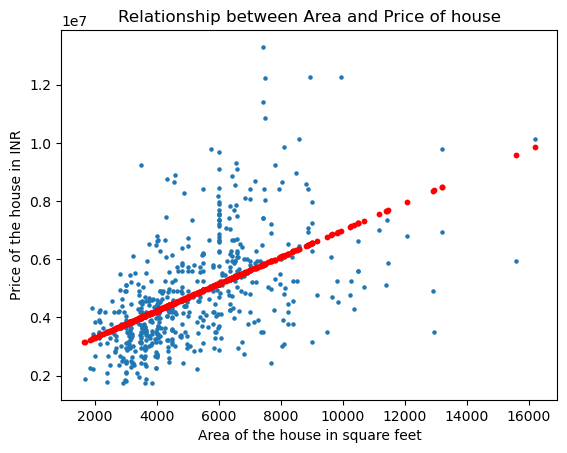

In [117]:
import matplotlib.pyplot as plt

# We have the housing data, let's do a quick scatter plot of price and the area
plt.figure()
# plot
plt.scatter(housing_df['area'], housing_df['price'], s=5)
plt.scatter(housing_df['area'], result.fittedvalues, color='red', s=10)

# add a label to the x axis
plt.xlabel('Area of the house in square feet')
# add a label to the y axis
plt.ylabel('Price of the house in INR')
# add a title
plt.title('Relationship between Area and Price of house');

### Interpretation of R2 value

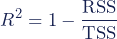

Where:

RSS = sum of squared residuals

TSS = total sum of squares


1. If the R2 is 0, the linear regression model doesn’t predict better than simply estimating that average y value.

2. If the R2 is between 0 and 1, the model predict exam scores better than simply using the average.

3. If the R2 is 1, the model perfectly predict


In [5]:
# In the above model we have R2 value of 0.287
result.rsquared

0.2872931546811468

### Interpretation of p-value of each coeff


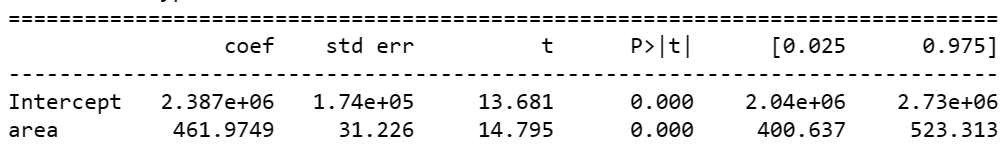


If you look at the above ouput, we see apart from the value of coefficient we have other information as well. This is related to the hypothesis testing of each coefficient value.

To know if a coefficient is statistically significant to predict the dependent variable we do hypothesis testing with H0 as the particular coefficient value is exactly 0 and H1 as that the particular coefficient value is not equal to 0.


Due to assumptions of linear regression, we had assumed that error term is normally distributed. With that assumption we know that each coefficient will follow studentized-t distribution (which is almost like normal distribution). All the coefficient values have the t-statistic value as well in the regresion ouput under the column "t". std err" is nothing but the standard deviation of the coefficient. 

"P>|t|" column is the p-value for our hypothesis testing. If p-value is low then we reject the null hypothesis (which is that coefficient average value is 0) and hence, the variable is significant for predicting the dependent variable.

If p-value is high (usually >0.05) then we accept the null hypothesis (which is that coefficient average value is 0) and hence, the variable is not significant in predicting the dependent variable. We should remove such variables from our model

In [8]:
# p-values for the coefficient
result.pvalues

Intercept    8.056160e-37
area         7.388225e-42
dtype: float64

### Interpretation of F-statistic

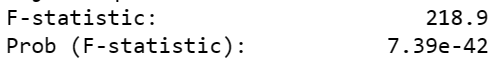

In the same way we check for the coefficient significance, we can check for the significance of the complete linear regression model. For that we have the null hypothesis as "all the coefficient values are equal to 0" and alternate hypothesis as "at least one coefficient value is not equal to 0"

We can test the above hypothesis using F-distribution and hence you see the F-statistic value being shown. Again we have the p-value and we will infer based on the p-value. If we have low p-value then we reject the null hypothesis (which means that our linear regression model is significant), if we have high p-value then we accept the null hypothesis (which means our linear regression model is not useful)

In [9]:
# p-value of the f-statistic
result.f_pvalue

7.388225401524132e-42

## Leverage and Influence Points

In regression, it is possible for a single point to have a big impact on the overall regression results but it is also possible to have a clear outlier that has little impact on the results. So we have good outliers and bad outliers.

We can measure the distance of points from "average of x" to quantify each observation’s potential for impact on the line using what is called the leverage of a point. Leverage is a positive numerical measure with larger values corresponding to more leverage.

We call an observation influential if its removal causes a “big” change in the regression line, specifically in terms of impacting the slope coefficient. Points that are on the edges of the  x's (far from the mean of the  x's) have the potential for more impact on the line.

The observations with  x-values that provide higher leverage have increased potential to influence the estimated regression line. 


Along with measuring the leverage, we can also measure the influence that each point has on the regression line using Cook’s Distance or Cook’s D. It also is a positive measure with higher values suggesting more influence. 


The rule of thumb is that Cook’s D values over 1.0 correspond to clearly influential points, values over 0.5 have some influence and values lower than 0.5 indicate points that are not influential on the regression model slope coefficients.

In [20]:
infl = result.get_influence()
cooks_distance = infl.summary_frame()['cooks_d']
cooks_distance

0      0.043451
1      0.049916
2      0.061522
3      0.032588
4      0.024278
         ...   
540    0.002800
541    0.002892
542    0.002952
543    0.003005
544    0.002929
Name: cooks_d, Length: 545, dtype: float64

## VIF - Multicollinearity

1. Multicollinearity refers to high correlation in more than two independent variables in the regression model (e.g. Multiple linear regression). Similarly, collinearity refers to a high correlation between two independent variables


2. Multicollinearity can arise from poorly designed experiments (Data-based multicollinearity) or from creating new independent variables related to the existing ones (structural multicollinearity)


3. Variance inflation factor (VIF) measures the degree of multicollinearity or collinearity in the regression model


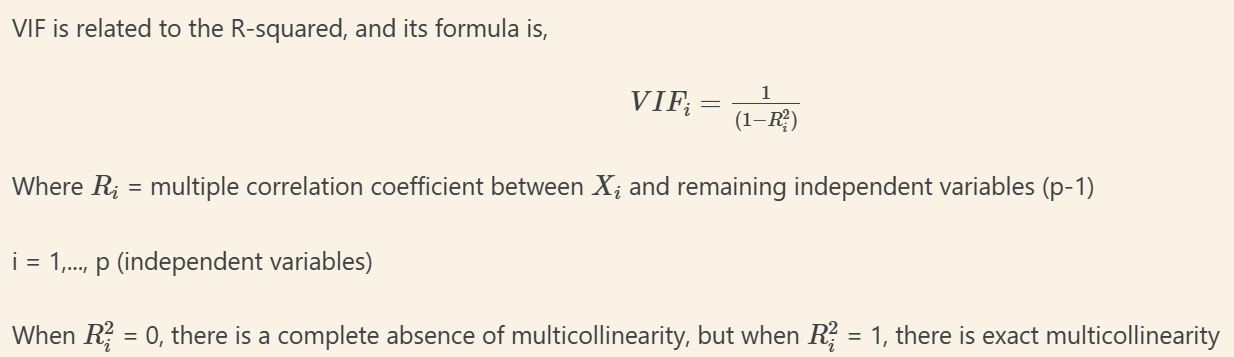

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

# the independent variables set 
X = add_constant(housing_df[['area', 'bathrooms', 'bedrooms', 'stories', 'parking']] )

# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_data)

     feature        VIF
0      const  21.415032
1       area   1.170959
2  bathrooms   1.252775
3   bedrooms   1.316597
4    stories   1.255202
5    parking   1.164172


In [52]:
pd.read_csv(r"E:\BIA\notebooks\datasets\Housing.csv").head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [53]:
pd.read_csv("datasets\Housing.csv").head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
